In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/census-income-data/CENSUS_INCOME.csv')

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Count unique values in the 'INCOME' column
income_counts = df['INCOME'].value_counts()

# Display the unique values and their counts
print(income_counts)


INCOME
 <=50K    24720
 >50K      7841
Name: count, dtype: int64


**What is the distribution of ages in the dataset? Create a histogram to visualize it.**

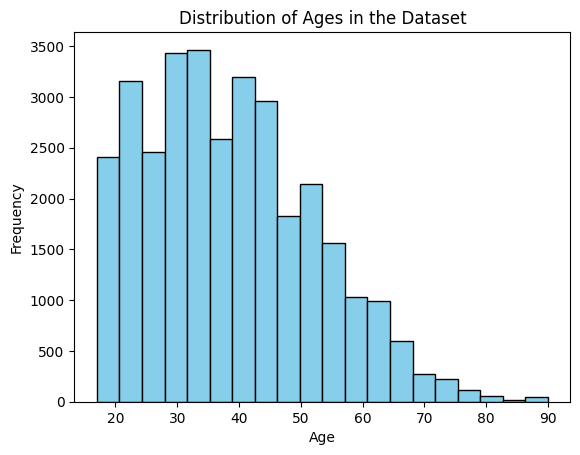

In [4]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'AGE' column
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in the Dataset')
plt.show()


In [5]:
# Group by 'EDUCATION' and calculate the average income for each group
education_income = df.groupby('EDUCATION')['INCOME'].value_counts(normalize=True).unstack().fillna(0)

# Display the summary
print(education_income)


INCOME            <=50K      >50K
EDUCATION                        
 10th          0.933548  0.066452
 11th          0.948936  0.051064
 12th          0.923788  0.076212
 1st-4th       0.964286  0.035714
 5th-6th       0.951952  0.048048
 7th-8th       0.938080  0.061920
 9th           0.947471  0.052529
 Assoc-acdm    0.751640  0.248360
 Assoc-voc     0.738784  0.261216
 Bachelors     0.585247  0.414753
 Doctorate     0.259080  0.740920
 HS-grad       0.840491  0.159509
 Masters       0.443413  0.556587
 Preschool     1.000000  0.000000
 Prof-school   0.265625  0.734375
 Some-college  0.809765  0.190235


In [6]:
# Count the number of males and females
sex_counts = df['SEX'].value_counts()

# Calculate the proportion
sex_proportion = sex_counts / len(df)

# Display the proportion of males and females
print(sex_proportion)


SEX
 Male      0.669205
 Female    0.330795
Name: count, dtype: float64


**Visualize the distribution of hours worked per week. What insights can you gather from the plot?**

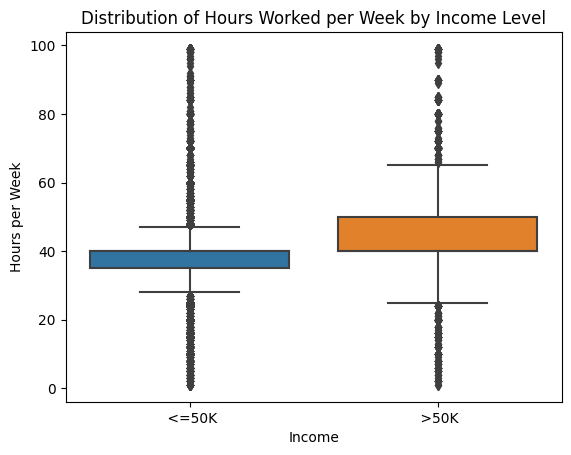

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of 'HOURS-PER-WEEK' distribution
sns.boxplot(x='INCOME', y='HOURS-PER-WEEK', data=df)
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Distribution of Hours Worked per Week by Income Level')
plt.show()


**Create a bar chart to show the count of individuals in each 'WORKCLASS' category.**

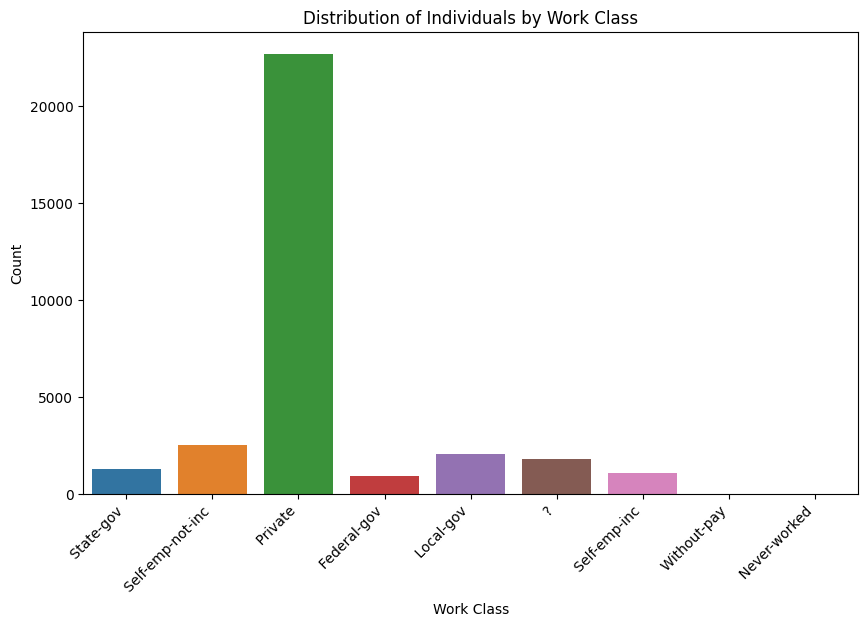

In [8]:
# Create a bar chart of 'WORKCLASS' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='WORKCLASS', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Work Class')
plt.show()


**Visualize the distribution of capital gains and losses. Are there any patterns or outliers?**

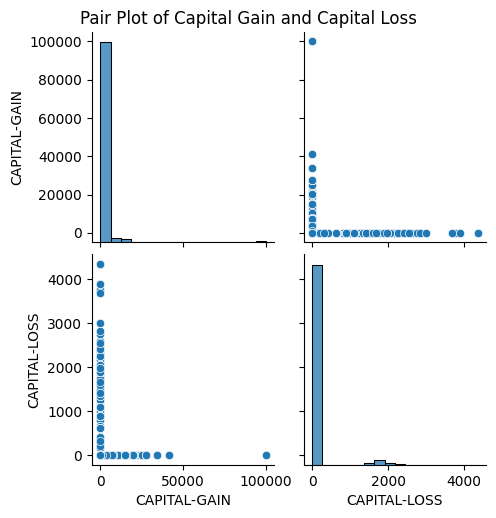

In [9]:
# Create a pair plot for 'CAPITAL-GAIN' and 'CAPITAL-LOSS'
sns.pairplot(df[['CAPITAL-GAIN', 'CAPITAL-LOSS']])
plt.suptitle('Pair Plot of Capital Gain and Capital Loss', y=1.02)
plt.show()


**Display a bar chart to show the count of individuals for each 'RACE' category.**

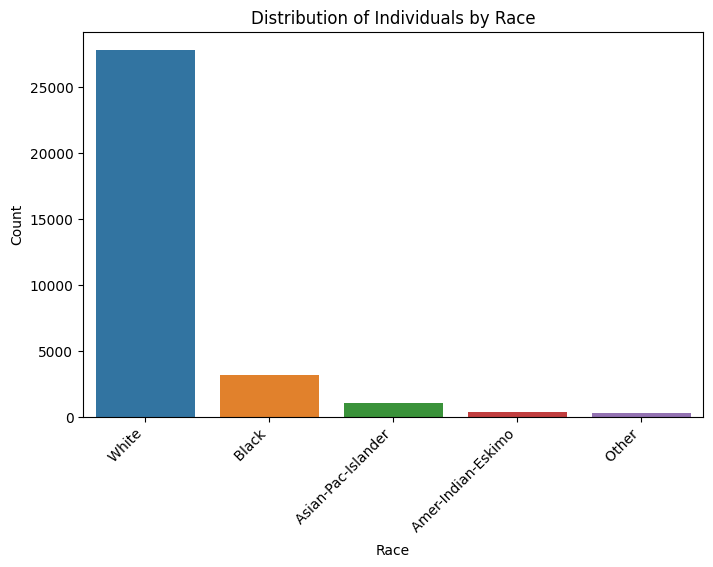

In [10]:
# Create a bar chart of 'RACE' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RACE', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Race')
plt.show()


**Visualize the distribution of ages for each 'MARITAL-STATUS' category**

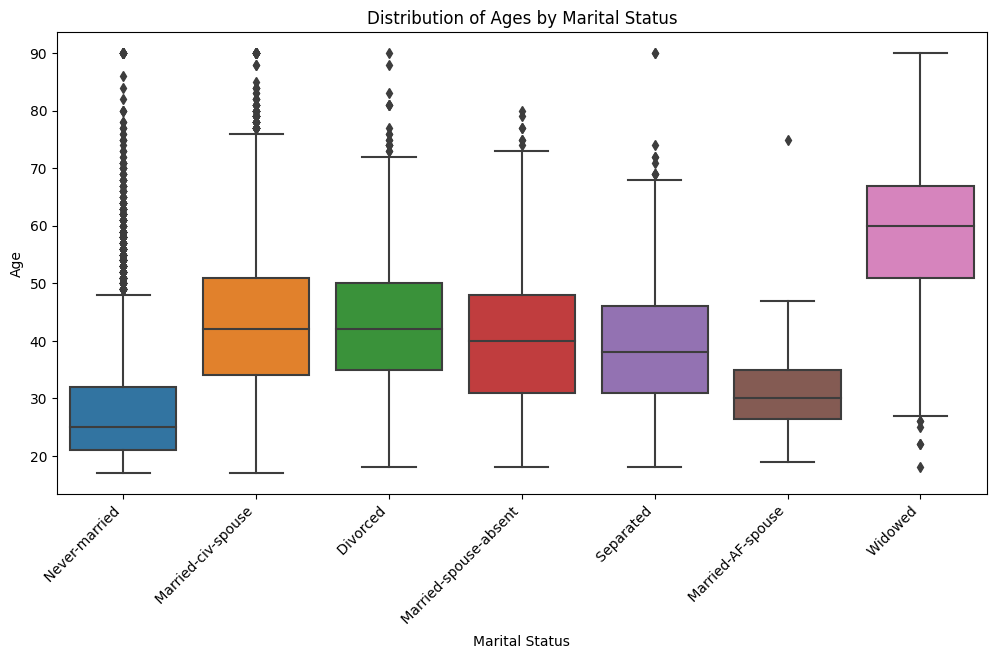

In [11]:
# Create a boxplot of 'AGE' distribution for each 'MARITAL-STATUS'
plt.figure(figsize=(12, 6))
sns.boxplot(x='MARITAL-STATUS', y='AGE', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Distribution of Ages by Marital Status')
plt.show()


**Create a bar chart to display the count of individuals in each 'EDUCATION' category.**

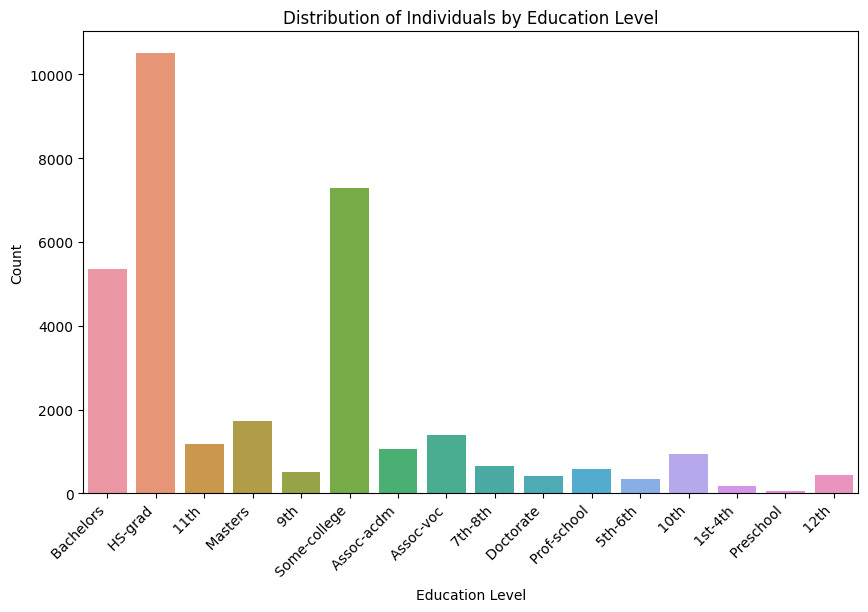

In [12]:
# Create a bar chart of 'EDUCATION' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCATION', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Education Level')
plt.show()


**Display a bar chart to show the count of individuals for each 'OCCUPATION' category.**

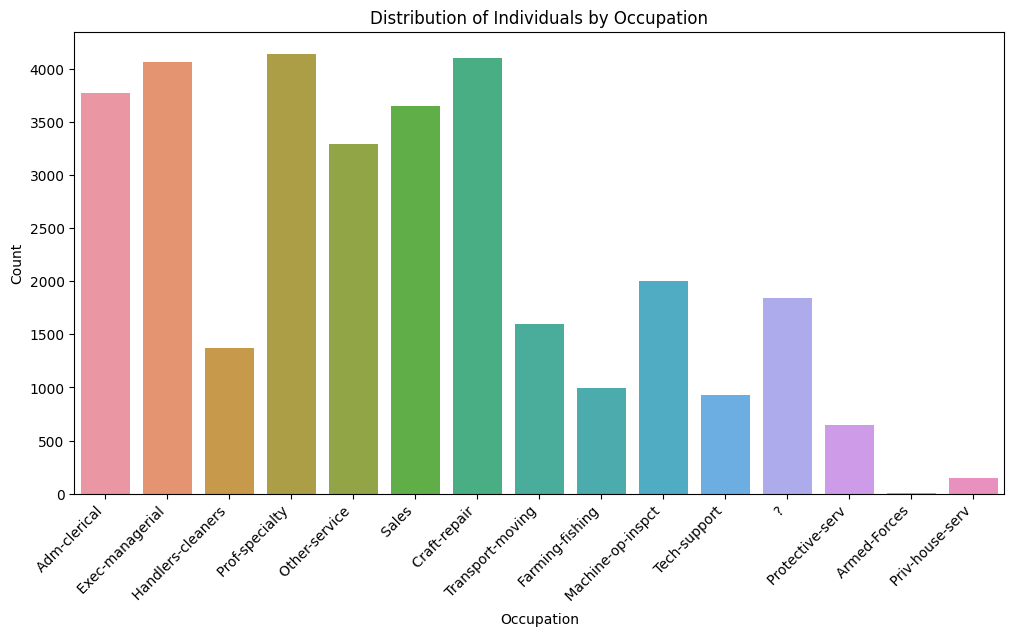

In [13]:
# Create a bar chart of 'OCCUPATION' distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='OCCUPATION', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Occupation')
plt.show()


**Visualize the count of individuals for each 'RELATIONSHIP' category**

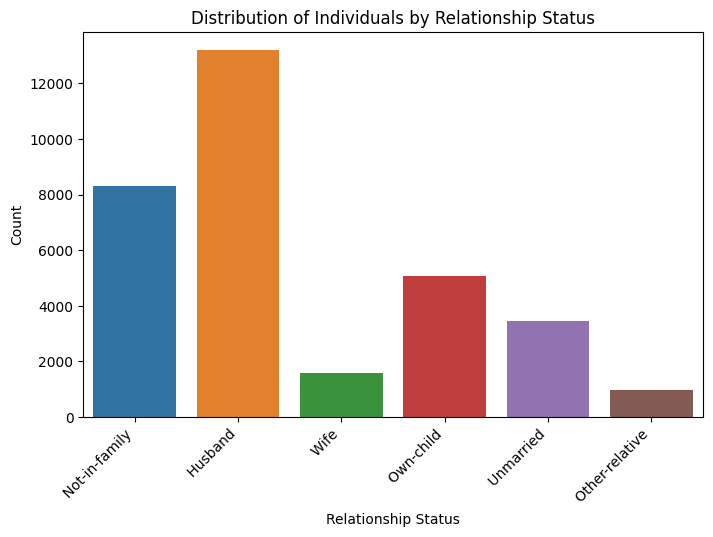

In [14]:
# Create a bar chart of 'RELATIONSHIP' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RELATIONSHIP', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Relationship Status')
plt.show()


**Display a bar chart to show the count of individuals in each 'NATIVE COUNTRY' category.**

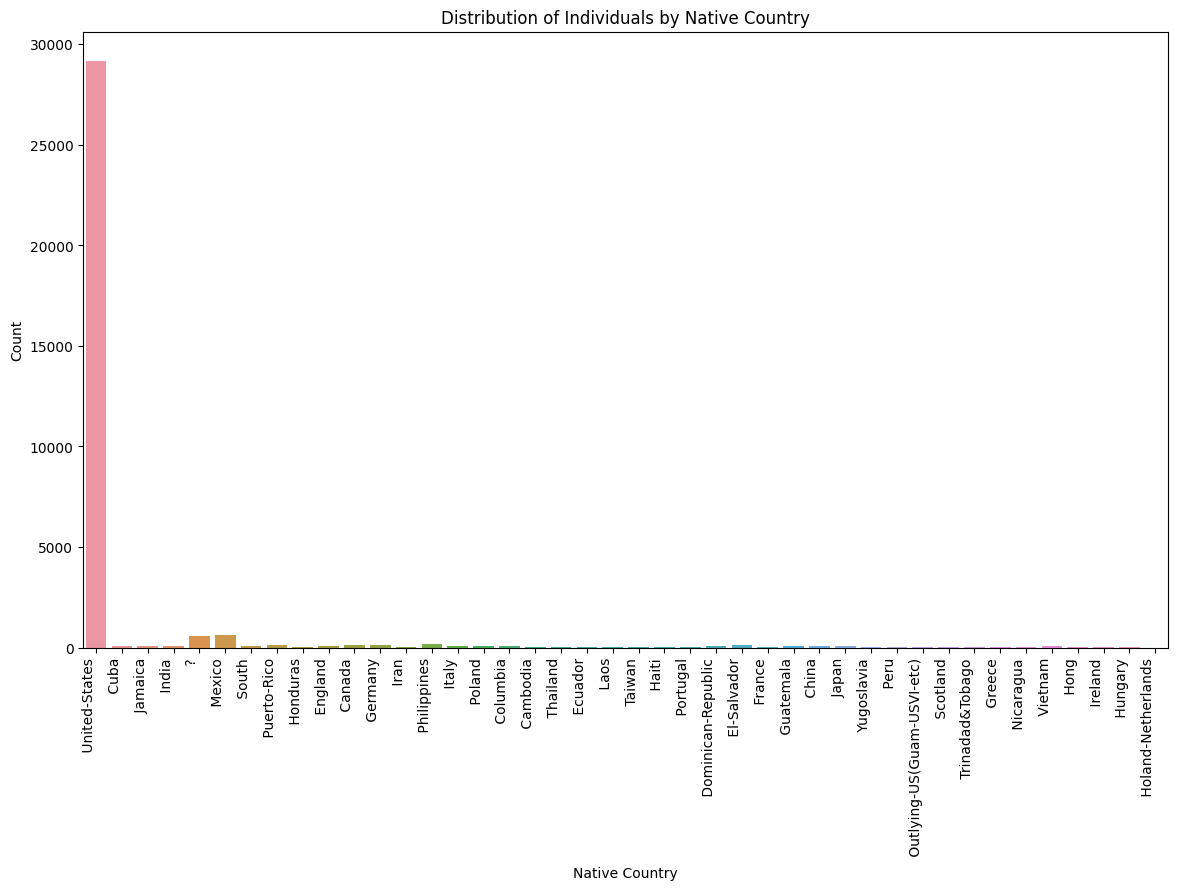

In [15]:
# Create a bar chart of 'NATIVE COUNTRY' distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='NATIVE COUNTRY', data=df)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Native Country')
plt.show()


**Create a bar chart to visualize the distribution of individuals by 'MARITAL-STATUS'.**

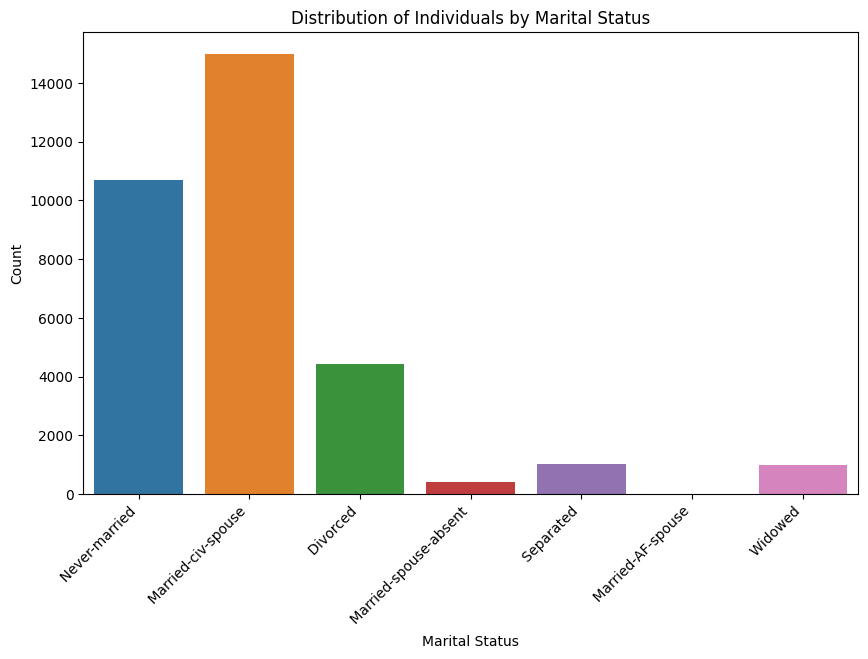

In [16]:
# Create a bar chart of 'MARITAL-STATUS' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='MARITAL-STATUS', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Marital Status')
plt.show()


**Display a bar chart to show the count of individuals in each 'WORKCLASS' category based on their 'INCOME' level.**

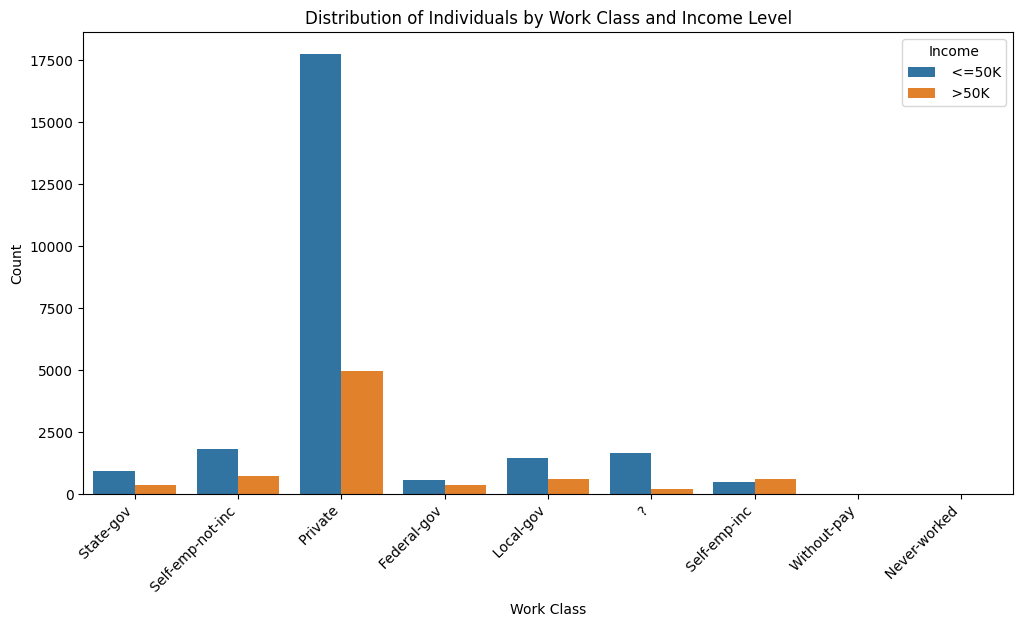

In [17]:
# Create a bar chart of 'WORKCLASS' distribution colored by 'INCOME'
plt.figure(figsize=(12, 6))
sns.countplot(x='WORKCLASS', hue='INCOME', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Work Class and Income Level')
plt.legend(title='Income', loc='upper right')
plt.show()


**Visualize the count of individuals for each 'RACE' category based on their 'SEX'**

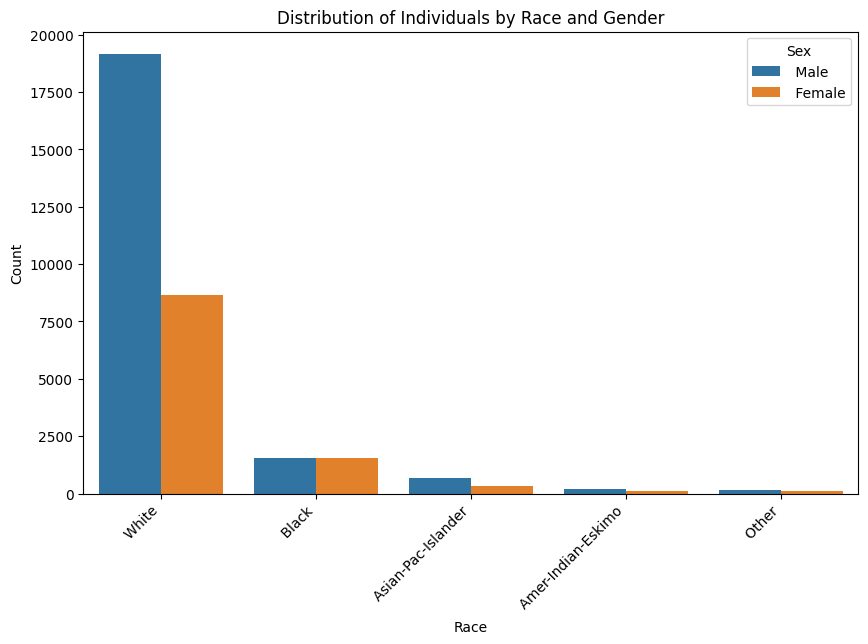

In [18]:
# Create a stacked bar chart of 'RACE' distribution colored by 'SEX'
plt.figure(figsize=(10, 6))
sns.countplot(x='RACE', hue='SEX', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Race and Gender')
plt.legend(title='Sex', loc='upper right')
plt.show()


**Create a bar chart to display the count of individuals in each 'EDUCATION' category based on their 'INCOME' level.**

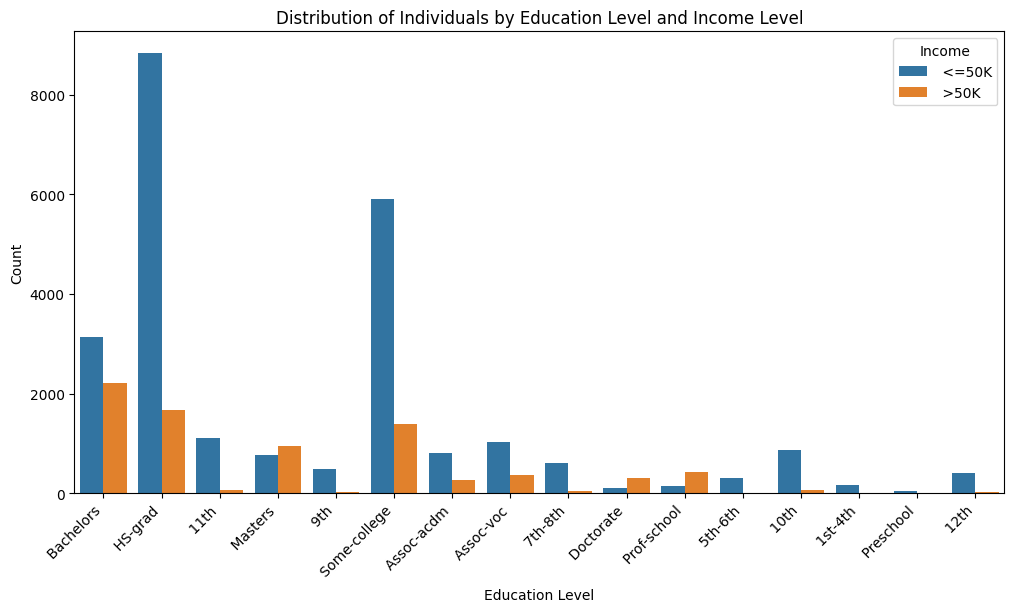

In [19]:
# Create a bar chart of 'EDUCATION' distribution colored by 'INCOME'
plt.figure(figsize=(12, 6))
sns.countplot(x='EDUCATION', hue='INCOME', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Education Level and Income Level')
plt.legend(title='Income', loc='upper right')
plt.show()


**Display a bar chart to show the count of individuals in each 'OCCUPATION' category based on their 'SEX'.**

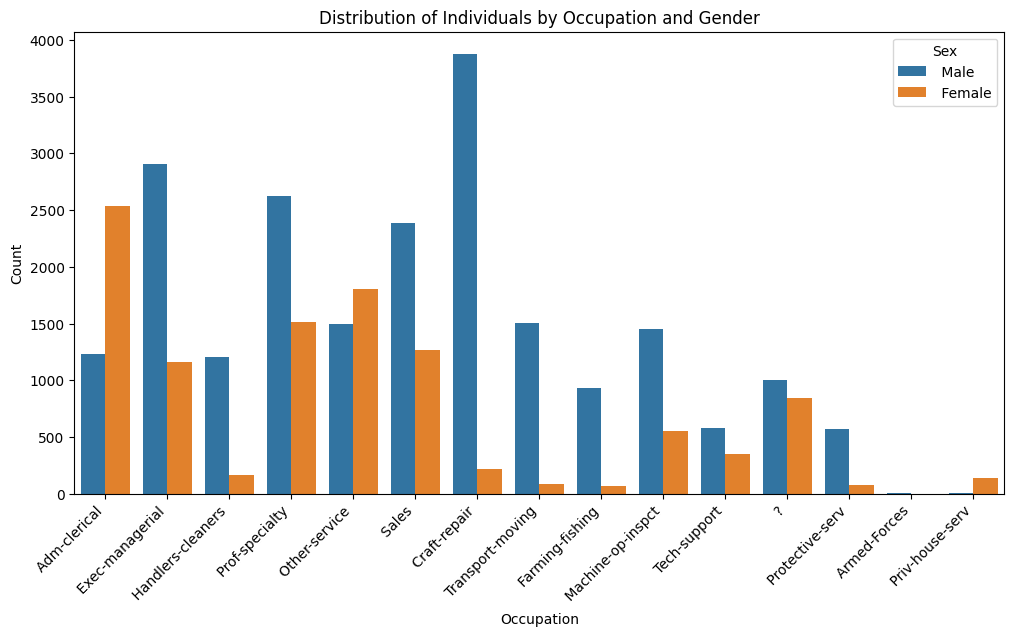

In [20]:
# Create a bar chart of 'OCCUPATION' distribution colored by 'SEX'
plt.figure(figsize=(12, 6))
sns.countplot(x='OCCUPATION', hue='SEX', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Individuals by Occupation and Gender')
plt.legend(title='Sex', loc='upper right')
plt.show()


**Create a scatter plot to visualize the relationship between 'AGE' and 'HOURS-PER-WEEK'.**

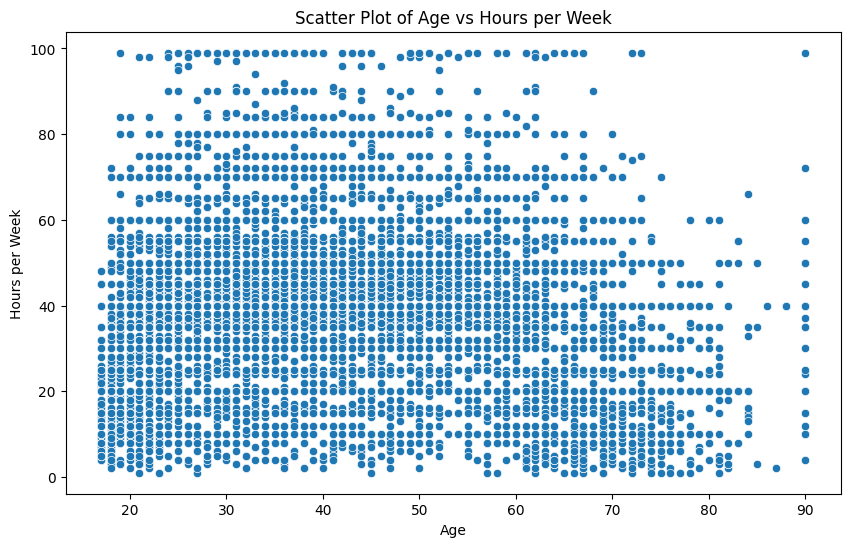

In [21]:
# Create a scatter plot of 'AGE' vs 'HOURS-PER-WEEK'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='HOURS-PER-WEEK', data=df)
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Scatter Plot of Age vs Hours per Week')
plt.show()


**Visualize the correlation between 'CAPITAL-GAIN' and 'CAPITAL-LOSS'**

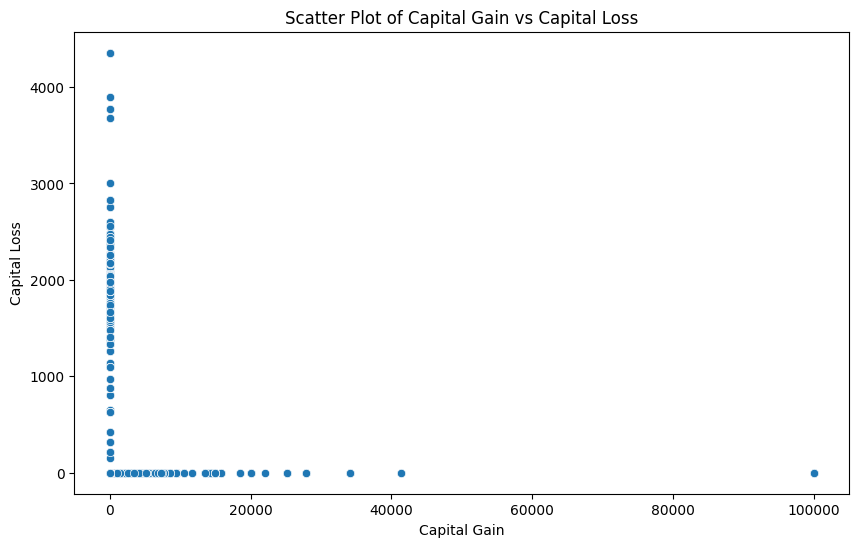

In [22]:
# Create a scatter plot of 'CAPITAL-GAIN' vs 'CAPITAL-LOSS'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CAPITAL-GAIN', y='CAPITAL-LOSS', data=df)
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.title('Scatter Plot of Capital Gain vs Capital Loss')
plt.show()


**Create a scatter plot to show the relationship between 'EDUCATION-NUM' and 'HOURS-PER-WEEK'. Do higher education numbers correspond to longer working hours?**

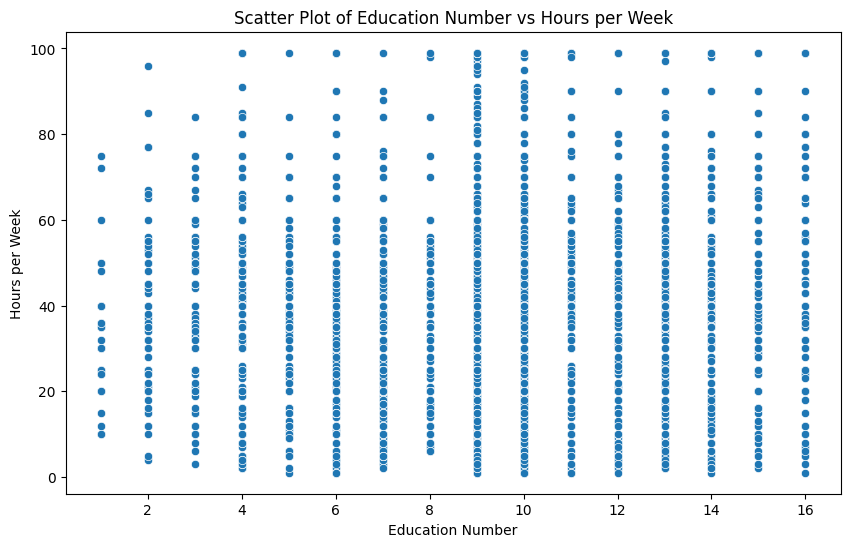

In [23]:
# Create a scatter plot of 'EDUCATION-NUM' vs 'HOURS-PER-WEEK'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EDUCATION-NUM', y='HOURS-PER-WEEK', data=df)
plt.xlabel('Education Number')
plt.ylabel('Hours per Week')
plt.title('Scatter Plot of Education Number vs Hours per Week')
plt.show()


**Visualize the scatter plot of 'AGE' vs 'CAPITAL-GAIN' colored by 'INCOME'. Are there discernible patterns in the relationship?**

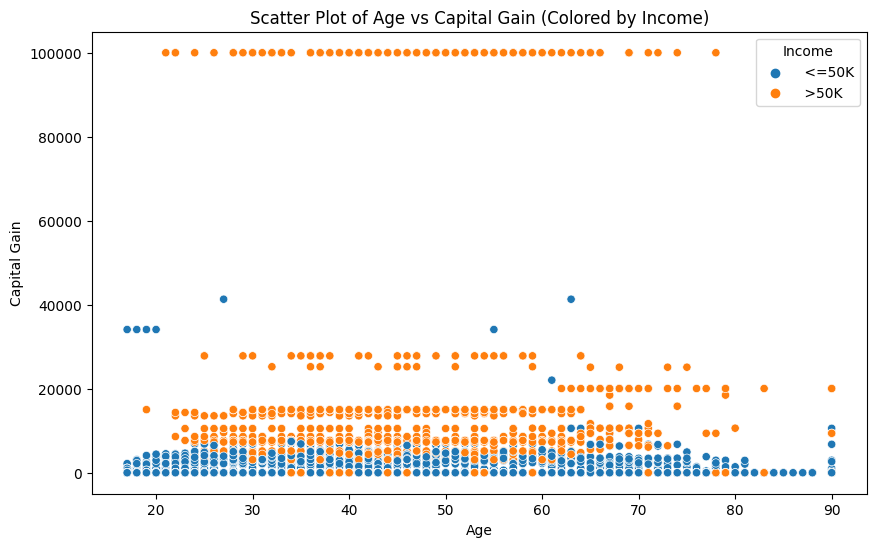

In [24]:
# Create a scatter plot of 'AGE' vs 'CAPITAL-GAIN' colored by 'INCOME'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='CAPITAL-GAIN', hue='INCOME', data=df)
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.title('Scatter Plot of Age vs Capital Gain (Colored by Income)')
plt.legend(title='Income', loc='upper right')
plt.show()


**Display a scatter plot to show the relationship between 'HOURS-PER-WEEK' and 'CAPITAL-GAIN'. Any noticeable patterns?**

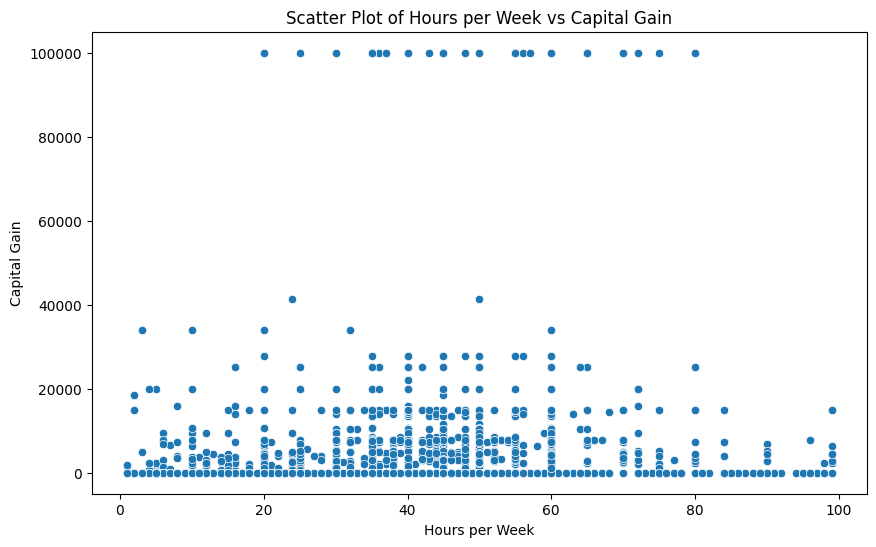

In [25]:
# Create a scatter plot of 'HOURS-PER-WEEK' vs 'CAPITAL-GAIN'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HOURS-PER-WEEK', y='CAPITAL-GAIN', data=df)
plt.xlabel('Hours per Week')
plt.ylabel('Capital Gain')
plt.title('Scatter Plot of Hours per Week vs Capital Gain')
plt.show()


**Create a pair plot to visualize the relationships between 'AGE', 'HOURS-PER-WEEK', and 'EDUCATION-NUM'.**

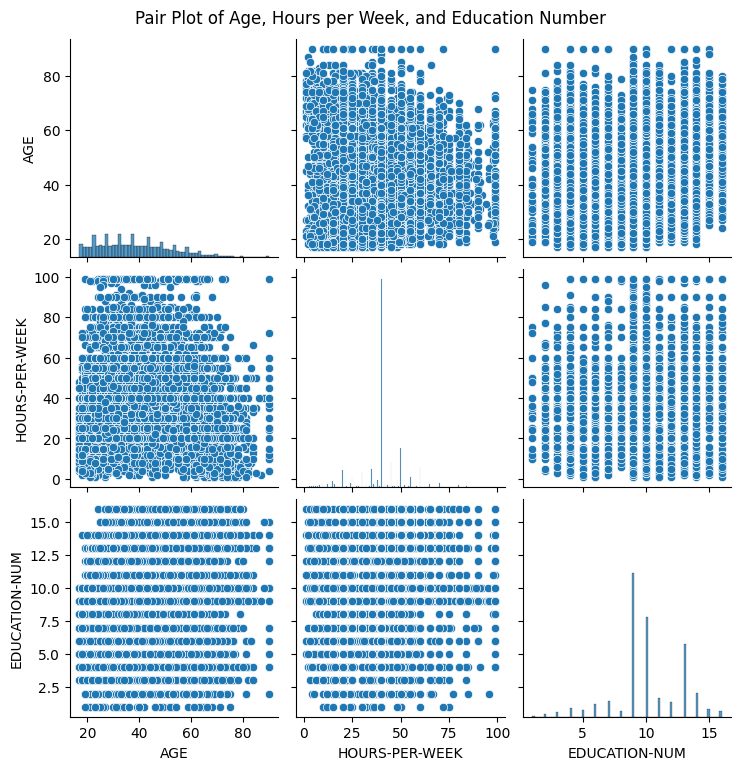

In [26]:
# Create a pair plot for 'AGE', 'HOURS-PER-WEEK', and 'EDUCATION-NUM'
sns.pairplot(df[['AGE', 'HOURS-PER-WEEK', 'EDUCATION-NUM']])
plt.suptitle('Pair Plot of Age, Hours per Week, and Education Number', y=1.02)
plt.show()


**Visualize the relationships between 'CAPITAL-GAIN', 'CAPITAL-LOSS', and 'HOURS-PER-WEEK' using a pair plot.**

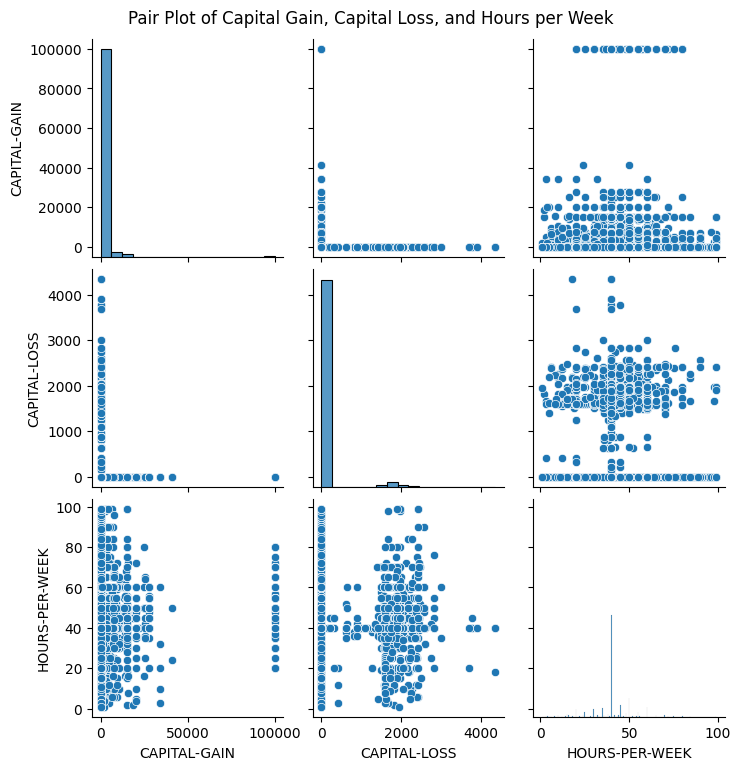

In [27]:
# Create a pair plot for 'CAPITAL-GAIN', 'CAPITAL-LOSS', and 'HOURS-PER-WEEK'
sns.pairplot(df[['CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK']])
plt.suptitle('Pair Plot of Capital Gain, Capital Loss, and Hours per Week', y=1.02)
plt.show()


**Create a pair plot to visualize the relationships between 'AGE', 'EDUCATION-NUM', and 'CAPITAL-GAIN' colored by 'INCOME'.**

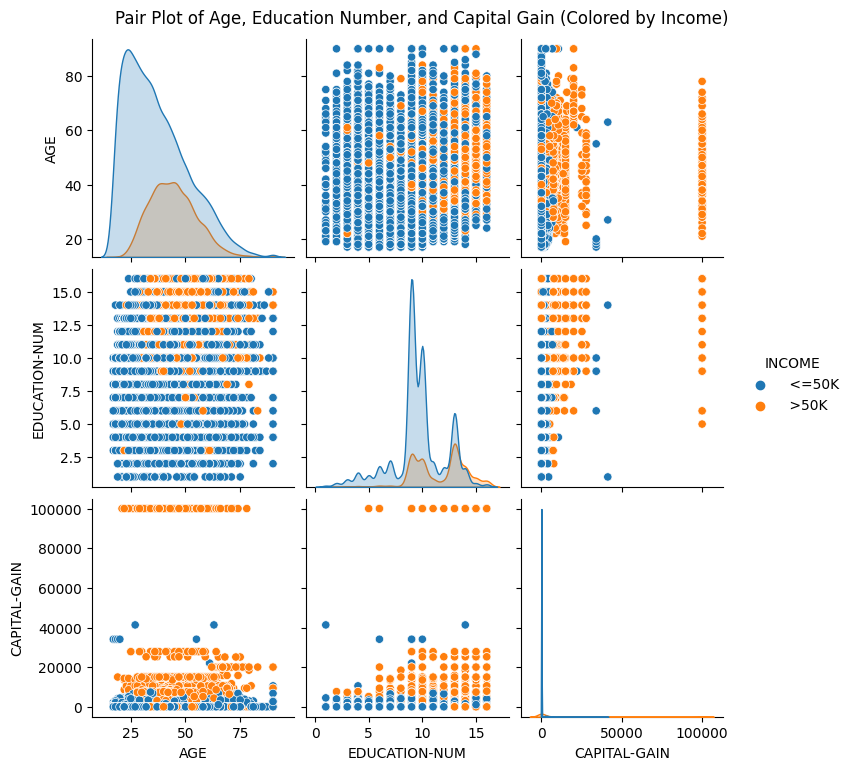

In [28]:
# Create a pair plot for 'AGE', 'EDUCATION-NUM', and 'CAPITAL-GAIN' colored by 'INCOME'
sns.pairplot(df[['AGE', 'EDUCATION-NUM', 'CAPITAL-GAIN', 'INCOME']], hue='INCOME')
plt.suptitle('Pair Plot of Age, Education Number, and Capital Gain (Colored by Income)', y=1.02)
plt.show()


**Visualize the relationships between 'AGE', 'HOURS-PER-WEEK', and 'CAPITAL-LOSS' colored by 'SEX'**

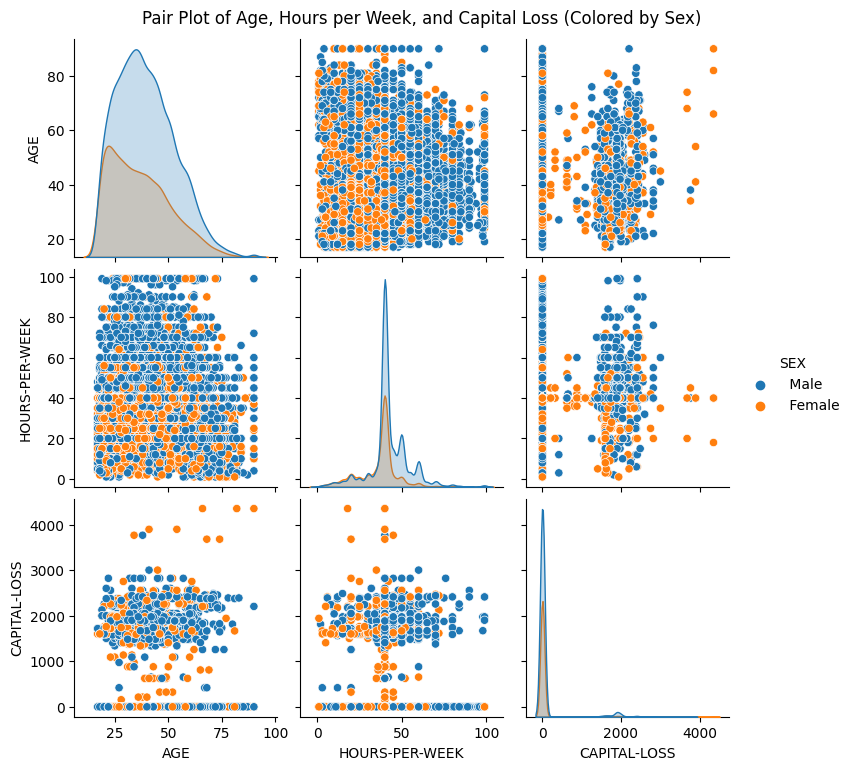

In [29]:
# Create a pair plot for 'AGE', 'HOURS-PER-WEEK', and 'CAPITAL-LOSS' colored by 'SEX'
sns.pairplot(df[['AGE', 'HOURS-PER-WEEK', 'CAPITAL-LOSS', 'SEX']], hue='SEX')
plt.suptitle('Pair Plot of Age, Hours per Week, and Capital Loss (Colored by Sex)', y=1.02)
plt.show()


**Display a pair plot to visualize the relationships between 'AGE', 'HOURS-PER-WEEK', and 'CAPITAL-GAIN' colored by 'RACE'.**

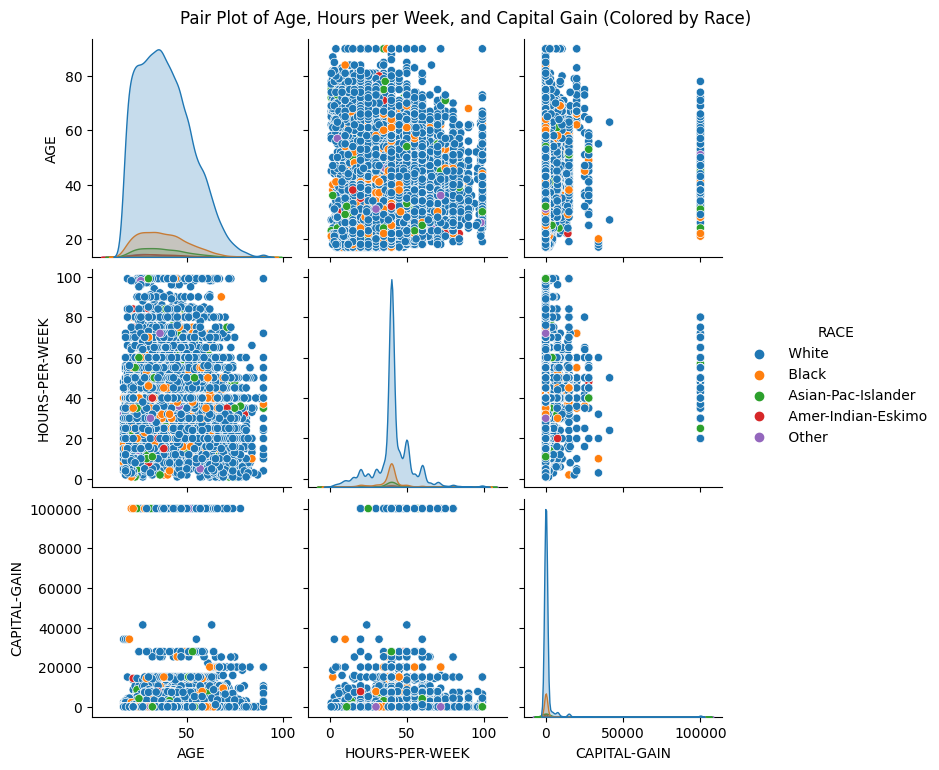

In [30]:
# Create a pair plot for 'AGE', 'HOURS-PER-WEEK', and 'CAPITAL-GAIN' colored by 'RACE'
sns.pairplot(df[['AGE', 'HOURS-PER-WEEK', 'CAPITAL-GAIN', 'RACE']], hue='RACE')
plt.suptitle('Pair Plot of Age, Hours per Week, and Capital Gain (Colored by Race)', y=1.02)
plt.show()
